Nama : Siti Rania Azaria  

NPM : 24083010072  

Analisis Numerik (A)

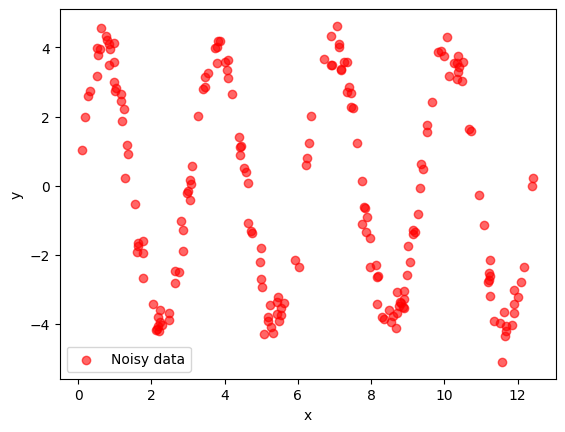

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
n = 200
NPM= 72

# Generate random x values between 0 and 4π
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)

# Original function
y_true = 4 * np.sin(2*x + 0.2)

# Add Gaussian noise
noise = np.random.normal(0, 0.4, n)  # mean=0, std=0.5
y_noisy = y_true + noise

# Plot
plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.6)
# plt.plot(np.sort(x), 4*np.sin(4*np.sort(x) + 0.2), label="True function", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# TUGAS: temukan kembali fungsi asli dengan interpolasi dari titik-titik data acak (y_noisy)

Visualisasi di atas menampilkan data mentah (data noisy)

 Tugas : temukan kembali fungsi asli dengan interpolasi dari titik-titik data acak (y_noisy)

**Interpolasi Metode Regresi Polinomial**


Polinomial orde 5: RMSE = 2.6470
Persamaan polinomial:
y = 6.8539 -8.6079 x^1 +3.5239 x^2 -0.6417 x^3 +0.0535 x^4 -0.0017 x^5

Polinomial orde 9: RMSE = 1.9622
Persamaan polinomial:
y = -8.0269 +68.3093 x^1 -113.9496 x^2 +80.1518 x^3 -29.8483 x^4 +6.4718 x^5 -0.8445 x^6 +0.0653 x^7 -0.0028 x^8 +0.0000 x^9

Polinomial orde 15: RMSE = 2.2364
Persamaan polinomial:
y = 0.9640 -0.0000 x^2 -0.0000 x^3 -0.0000 x^4 -0.0000 x^5 -0.0001 x^6 -0.0002 x^7 -0.0002 x^8 +0.0001 x^9 +0.0000 x^10 -0.0000 x^11 +0.0000 x^12


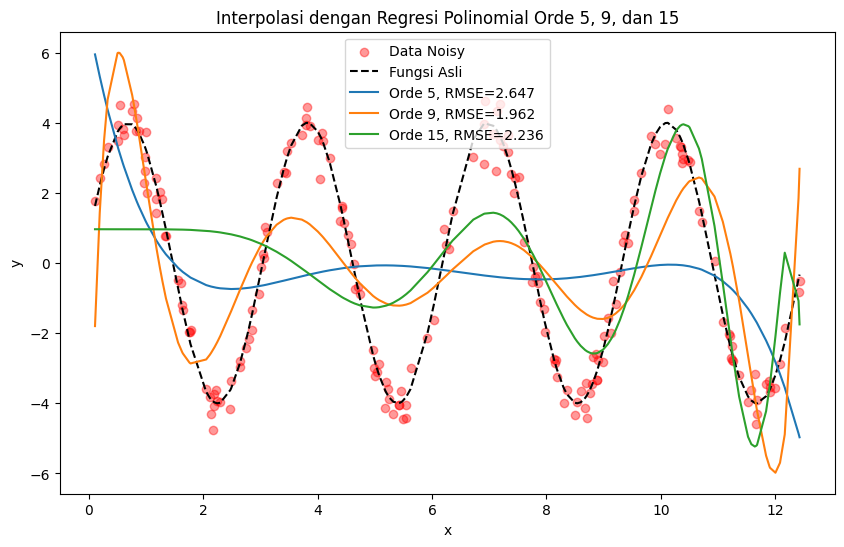

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Number of points
n = 200
NPM = 72

# Generate random x values between 0 and 4π
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)
x = np.sort(x)
X = x.reshape(-1, 1)

# Original function
y_true = 4 * np.sin(2*x + 0.2)

# Add Gaussian noise
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

# Daftar orde polinomial yang mau dicoba
degrees = [5, 9, 15]

plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, label="Data Noisy", color="red", alpha=0.4)
plt.plot(x, y_true, label="Fungsi Asli", color="black", linestyle="--")

# Loop untuk beberapa derajat polinomial
for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y_noisy)
    y_pred = model.predict(X_poly)

    # Hitung RMSE terhadap fungsi asli
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\nPolinomial orde {deg}: RMSE = {rmse:.4f}")

    # Ambil koefisien polinomial
    coef = model.coef_
    intercept = model.intercept_

    # Susun persamaan polinomial
    terms = [f"{intercept:.4f}"]
    for i, c in enumerate(coef[1:], start=1):
        if abs(c) > 1e-6:
            terms.append(f"{c:+.4f} x^{i}")
    persamaan = " ".join(terms)

    print("Persamaan polinomial:")
    print("y =", persamaan)

    # Plot hasil
    plt.plot(x, y_pred, label=f"Orde {deg}, RMSE={rmse:.3f}")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Interpolasi dengan Regresi Polinomial Orde 5, 9, dan 15")
plt.show()

Penjelasan interpolasi dengan metode regresi polinomial orde 5, 9, dan 15  
- Titik merah (scatter) = data noisy  
- Garis hitam putus-putus = fungsi asli y=4sin(2x+0.2)
- Garis biru = hasil regresi polinomial orde 5, RMSE=2.647
- Garis jingga = hasil regresi polinomial orde 9, RMSE=1.962
- Garis hijau = hasil regresi polinomial orde 15, RMSE=2.236  

Berdasarkan visualisasi kurva dan hasil RMSE, dapat disimpulkan bahwa :     
- Polinomial dengan orde rendah (5) tidak mampu mengikuti pola sinusoidal (underfitting)
- Polinomial dengan orde menengah (9) cukup mengikuti fungsi asli
- Polinomial dengan orde tinggi (15) dapat lebih mengikuti pola, namun rawan terjadi overfitting  

Berdasarkan 3 perbandingan orde di atas, regresi polinomial dengan orde 9 terlihat lebih representatif terhadap fungsi asli dan hasil kurva yang didapatkan paling seimbang.

**Parametric Sinusoidal Fit**

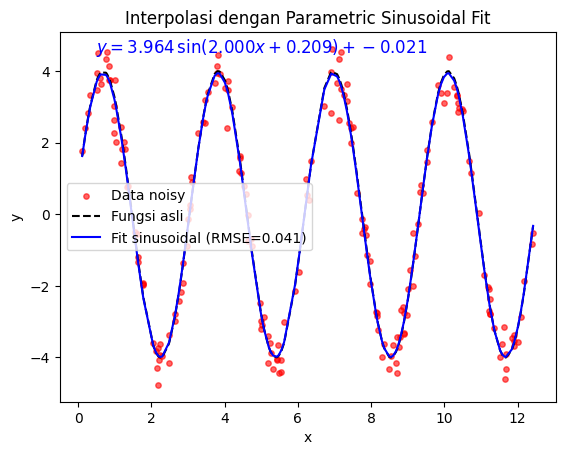

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Fungsi target (model sinusoidal)
def sinusoidal(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

# Number of points
n = 200
NPM = 72

# Generate random x values antara 0 sampai 4π
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)
x = np.sort(x)

# Fungsi asli
y_true = 4 * np.sin(2*x + 0.2)

# Tambahkan noise Gaussian
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

# Fitting parameter sinusoidal
popt, pcov = curve_fit(sinusoidal, x, y_noisy, p0=[4, 2, 0.2, 0])
A, B, C, D = popt

# Hasil fitting
y_fit = sinusoidal(x, A, B, C, D)

# Hitung RMSE
rmse = np.sqrt(np.mean((y_fit - y_true) ** 2))

# Plot
plt.scatter(x, y_noisy, color='red', label='Data noisy', s=15, alpha=0.6)
plt.plot(x, y_true, 'k--', label='Fungsi asli')
plt.plot(x, y_fit, 'b-', label=f'Fit sinusoidal (RMSE={rmse:.3f})')

# Persamaan hasil fitting ditampilkan di plot
eq = f"$y = {A:.3f} \\, \\sin({B:.3f}x + {C:.3f}) + {D:.3f}$"
plt.text(0.5, 4.5, eq, fontsize=12, color="blue")

plt.title("Interpolasi dengan Parametric Sinusoidal Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Penjelasan Interpolasi dengan Metode Parametric Sinusoidal Fit  
- Titik merah = data noisy
- Garis hitam putus-putus = fungsi asli yang menunjukkan y=4sin(2x+0.2)
- Garis biru = hasil fitting dengan model sinusoidal.

Hasil estimasi parameter yang muncul adalah y=3.964sin(2.000x+0.209)−0.021 yang berarti nilai ini sangat dekat dengan fungsi asli.
Amplitudo = 4
Frekuensi = 2
Fase = 2
Offset = 0
Nilai RMSE yang dihasilkan sangat kecil yang menunjukkan bahwa hasil fitting mendekati fungsi asli dengan error yang hampir nol.


**Perbandingan Interpolasi Metode Regresi Polinomial vs Sinusoidal Fit**

Polinomial orde 5: RMSE = 2.6470
Polinomial orde 9: RMSE = 1.9622
Polinomial orde 15: RMSE = 2.2364
Sinusoidal Fit: RMSE = 0.0413


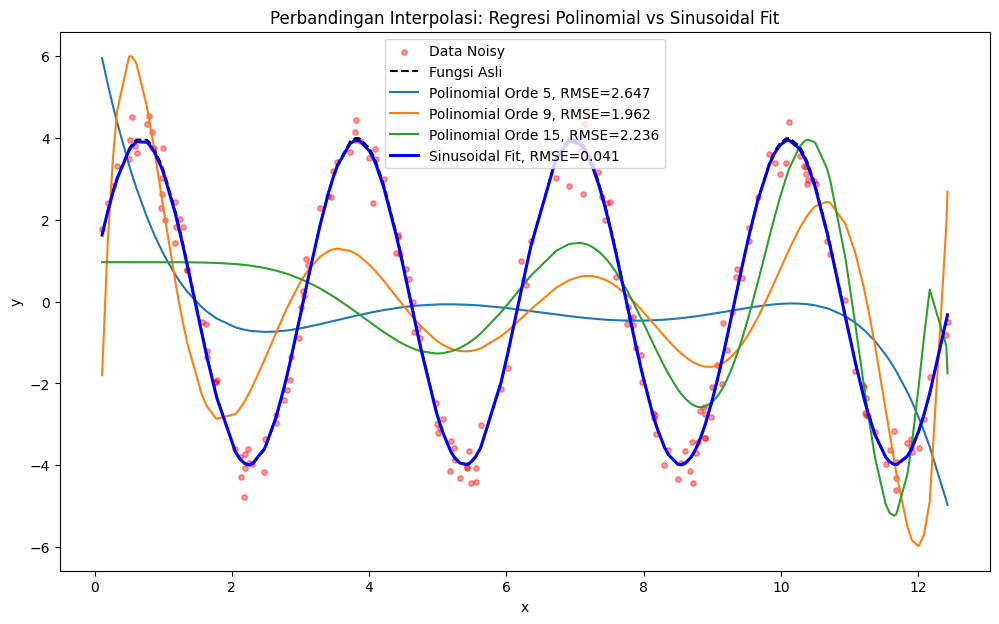

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

# Fungsi target sinusoidal
def sinusoidal(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

# Jumlah data
n = 200
NPM = 72

# Generate data acak (0 sampai 4π)
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)
x = np.sort(x)
X = x.reshape(-1, 1)

# Fungsi asli
y_true = 4 * np.sin(2*x + 0.2)

# Tambahkan noise Gaussian
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

# Regresi Polinomial
degrees = [5, 9, 15]

plt.figure(figsize=(12, 7))
plt.scatter(x, y_noisy, label="Data Noisy", color="red", alpha=0.4, s=15)
plt.plot(x, y_true, label="Fungsi Asli", color="black", linestyle="--")

for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y_noisy)
    y_pred = model.predict(X_poly)

    # Hitung RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"Polinomial orde {deg}: RMSE = {rmse:.4f}")

    plt.plot(x, y_pred, label=f"Polinomial Orde {deg}, RMSE={rmse:.3f}")

# Parametric Sinusoidal Fit
popt, pcov = curve_fit(sinusoidal, x, y_noisy, p0=[4, 2, 0.2, 0])
A, B, C, D = popt
y_fit = sinusoidal(x, A, B, C, D)

# Hitung RMSE
rmse_sinus = np.sqrt(np.mean((y_fit - y_true) ** 2))
print(f"Sinusoidal Fit: RMSE = {rmse_sinus:.4f}")

plt.plot(x, y_fit, 'b-', linewidth=2.2,
         label=f"Sinusoidal Fit, RMSE={rmse_sinus:.3f}")

# Finalisasi Plot
plt.title("Perbandingan Interpolasi: Regresi Polinomial vs Sinusoidal Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Perbandingan Interpolasi Metode Regresi Polinomial dengan Metode Sinusoidal Fit  

**Regresi Polinomial**  
kelebihan :    
- cocok digunakan untuk fungsi non-sinusoidal
- cocok untuk data yang memiliki tren polinomial  

kekurangan :   
- tidak cocok untuk data dengan pola periodik (contohnya sinusoidal)
- rawan terjadi underfitting (jika orde terlalu rendah) dan overfitting (jika orde terlalu tinggi)

**Parametric Sinusoidal Fit**  
kelebihan :    
- sangat cocok untuk data dengan pola periodik (pada kasus ini, contohnya sinusoidal)
- hasil fit mendekati fungsi asli
- parameter hasil fit memiliki arti yang jelas dari amplitudo, frekuensi, fase, dan pergeseran vertikal.  

kekurangan :    
- membutuhkan dugaan awal
- kurang cocok untuk data yang tidak berbentuk sinusoidal (misalnya tren linier, eksponensial, dsb)  

Melalui perbandingan tersebut dapat disimpulkan bahwa Parametric Sinusoidal Fit lebih cocok digunakan dibanding regresi polinomial untuk kasus ini. Karena data aslinya juga berasal dari fungsi sinusoidal.